# 와인 품질(Quality) 분류 경진대회
###### url : https://dacon.io/competitions/open/235610/overview/description
### 목표 : 와인의 품질이 좋은지 나쁜지 예측할 수 있는 모델을 수립
- 참고[EDA] : Dacon 코드공유 3개 + Google[의미 없었음]
- 참고[모델링] : https://data-marketing-bk.tistory.com/28

# <span style="color:Blue">EDA</span> : 1단계

## <span style="color:red">[0]</span> 데이터 파악하기

- index : 구분자 <span style="color:red">[이산형]</span> 의미 없음
- quality : 품질 <span style="color:red">[이산형]</span> 3 ~ 9(높을 수록 좋은 품질) [종속변수]
- fixed acidity : 산도 <span style="color:red">[이산형]</span> 
- volatile acidity : 휘발성산 <span style="color:red">[이산형]</span> 
- citric acid : 시트르산 <span style="color:red">[이산형]</span> 
- residual sugar : 잔당(발효 후 와인 속에 남아있는 당분) <span style="color:red">[이산형]</span> 
- chlorides : 염화물 <span style="color:red">[이산형]</span> 
- free sulfur dioxide : 독립 이산화황 <span style="color:red">[이산형]</span> 
- total sulfur dioxide : 총 이산화황 <span style="color:red">[이산형]</span> 
- density : 밀도 <span style="color:red">[이산형]</span> 
- pH : 수소이온농도 <span style="color:red">[이산형]</span> 
- sulphates : 황산염 <span style="color:red">[이산형]</span> 
- alcohol : 도수 <span style="color:red">[이산형]</span> 
- type : 종류 <span style="color:red">[명목형]</span> white or red
---
##### [표1] 자료 형태 파악하기
|분류|데이터|설명|예시|
|:---:|:---:|:---:|:---:|
|범주형|명목형|숫자로 표시할 수 없으나, 편의상 숫자화.|남자-0, 여자-1|
|범주형|순서형|숫자로  표시할 수 없으나, 편의상 숫자화. (순위 개념)|소득분위 10분위 > 9 분위 > 8 분위|
|수치형|연속형|데이터가 연속량으로서 셀 수 있는 형태|키 - 166.1cm|
|수치형|이산형|데이터가 비연 속량으로서 셀 수 있는 형태|자식 수 5명|
##### [표2] 데이터 조합 별 통계 및 시각화 방법
|데이터 조합|요약통계|시각화|
|:---:|:---:|:---:|
|범주형 - 범주형|교차 테이블|모자이크 플롯|
|범주형 - 수치형|카테고리별 통계 값|박스 플롯|
|수치형 - 수치형|상관계수|산점도|
---

## <span style="color:red">[1]</span> 라이브러리 불러오기 및 데이터 가져오기

In [2]:
# Raekkkky's EDA Setting

# 데이터 분석 LIBRARY[모듈] '데분정 - p28'
import numpy as np # 과학 계산 및 수학 계산
import pandas as pd # 데이터 처리 및 분석

# 데이터 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것

# 아래와 같이 함수를 선언하면 경고 안뜸!
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
# 오류가 아닌 '경고'가 뜬다면, "numeric_only = True" 넣어주기!
# 파일 경로 얻는 꿀탑 : MAC기준 option누른 상태로 객체 클릭 "경로 복사"

In [3]:
# Load Data
train = pd.read_csv('/Users/raekkkky/Desktop/DNA/Semester_2023_1/Project2/train.csv')
test = pd.read_csv('/Users/raekkkky/Desktop/DNA/Semester_2023_1/Project2/test.csv')
sample_submisson = pd.read_csv('/Users/raekkkky/Desktop/DNA/Semester_2023_1/Project2/sample_submission.csv')

## <span style="color:red">[2]</span> 데이터 파악하고 상관관계 및 가정하기

In [4]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [5]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 101.7+ KB


In [8]:
train.isnull().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [9]:
test.isnull().sum()

index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [10]:
train.describe(include = 'all')

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4159
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918,NaN
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524,NaN
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,NaN
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,NaN
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,NaN
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,NaN


In [11]:
test.describe(include = 'all')

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,739
mean,499.500000,7.243850,0.347930,0.319130,5.47160,0.057275,31.117000,116.723500,0.994825,3.213000,0.535360,10.419693,NaN
std,288.819436,1.344372,0.172043,0.146561,4.76628,0.037048,18.156527,57.808145,0.002912,0.161165,0.145525,1.180694,NaN
min,0.000000,4.200000,0.080000,0.000000,0.70000,0.014000,1.000000,7.000000,0.988150,2.720000,0.230000,8.400000,NaN
25%,249.750000,6.400000,0.230000,0.240000,1.80000,0.039000,17.750000,76.750000,0.992448,3.100000,0.437500,9.500000,NaN
50%,499.500000,7.000000,0.300000,0.300000,2.90000,0.048000,29.000000,118.500000,0.995130,3.200000,0.510000,10.200000,NaN
75%,749.250000,7.700000,0.410000,0.392500,8.20000,0.067250,42.000000,156.000000,0.997060,3.312500,0.620000,11.200000,NaN


In [12]:
train.shape, test.shape

((5497, 14), (1000, 13))

In [13]:
train['quality'].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

In [14]:
train.corr()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
index,1.000000,-0.008045,-0.011214,-0.012566,-0.015858,0.000727,-0.015198,0.007370,0.023697,-0.009455,-0.018246,-0.006651,-0.002234
quality,-0.008045,1.000000,-0.076506,-0.261557,0.079157,-0.032848,-0.198148,0.055574,-0.039732,-0.299831,0.017931,0.042068,0.439615
fixed acidity,-0.011214,-0.076506,1.000000,0.210180,0.326992,-0.112544,0.303307,-0.277079,-0.323845,0.452161,-0.250462,0.300979,-0.096274
volatile acidity,-0.012566,-0.261557,0.210180,1.000000,-0.377986,-0.192677,0.385431,-0.352572,-0.418535,0.266759,0.264130,0.225174,-0.032897
citric acid,-0.015858,0.079157,0.326992,-0.377986,1.000000,0.135160,0.029121,0.129496,0.190955,0.088400,-0.322100,0.049013,-0.005376
residual sugar,0.000727,-0.032848,-0.112544,-0.192677,0.135160,1.000000,-0.130339,0.396018,0.494788,0.557183,-0.259673,-0.182275,-0.361457
chlorides,-0.015198,-0.198148,0.303307,0.385431,0.029121,-0.130339,1.000000,-0.193143,-0.281654,0.364200,0.046937,0.400354,-0.259774
free sulfur dioxide,0.007370,0.055574,-0.277079,-0.352572,0.129496,0.396018,-0.193143,1.000000,0.716829,0.027270,-0.145586,-0.189390,-0.182321
total sulfur dioxide,0.023697,-0.039732,-0.323845,-0.418535,0.190955,0.494788,-0.281654,0.716829,1.000000,0.039707,-0.234412,-0.272236,-0.271566
density,-0.009455,-0.299831,0.452161,0.266759,0.088400,0.557183,0.364200,0.027270,0.039707,1.000000,0.020047,0.261879,-0.688053


In [15]:
test.corr()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
index,1.000000,-0.034111,-0.008565,-0.014859,-0.048049,-0.011269,-0.025329,0.006737,-0.074818,-0.024398,0.012581,0.047725
fixed acidity,-0.034111,1.000000,0.262303,0.311256,-0.109286,0.272506,-0.312851,-0.356384,0.496402,-0.264014,0.292054,-0.089880
volatile acidity,-0.008565,0.262303,1.000000,-0.378974,-0.214212,0.335458,-0.355142,-0.395574,0.294861,0.250286,0.229744,-0.059417
citric acid,-0.014859,0.311256,-0.378974,1.000000,0.182067,0.089262,0.152342,0.217969,0.139879,-0.371774,0.096314,-0.038476
residual sugar,-0.048049,-0.109286,-0.214212,0.182067,1.000000,-0.122314,0.439636,0.499293,0.526628,-0.309135,-0.206864,-0.348459
chlorides,-0.011269,0.272506,0.335458,0.089262,-0.122314,1.000000,-0.206243,-0.270590,0.354635,0.034761,0.371226,-0.240988
free sulfur dioxide,-0.025329,-0.312851,-0.355142,0.152342,0.439636,-0.206243,1.000000,0.742264,0.015498,-0.146196,-0.184847,-0.164646
total sulfur dioxide,0.006737,-0.356384,-0.395574,0.217969,0.499293,-0.270590,0.742264,1.000000,-0.008937,-0.259363,-0.295988,-0.233717
density,-0.074818,0.496402,0.294861,0.139879,0.526628,0.354635,0.015498,-0.008937,1.000000,-0.033986,0.244409,-0.678505
pH,-0.024398,-0.264014,0.250286,-0.371774,-0.309135,0.034761,-0.146196,-0.259363,-0.033986,1.000000,0.220200,0.154048


<Axes: >

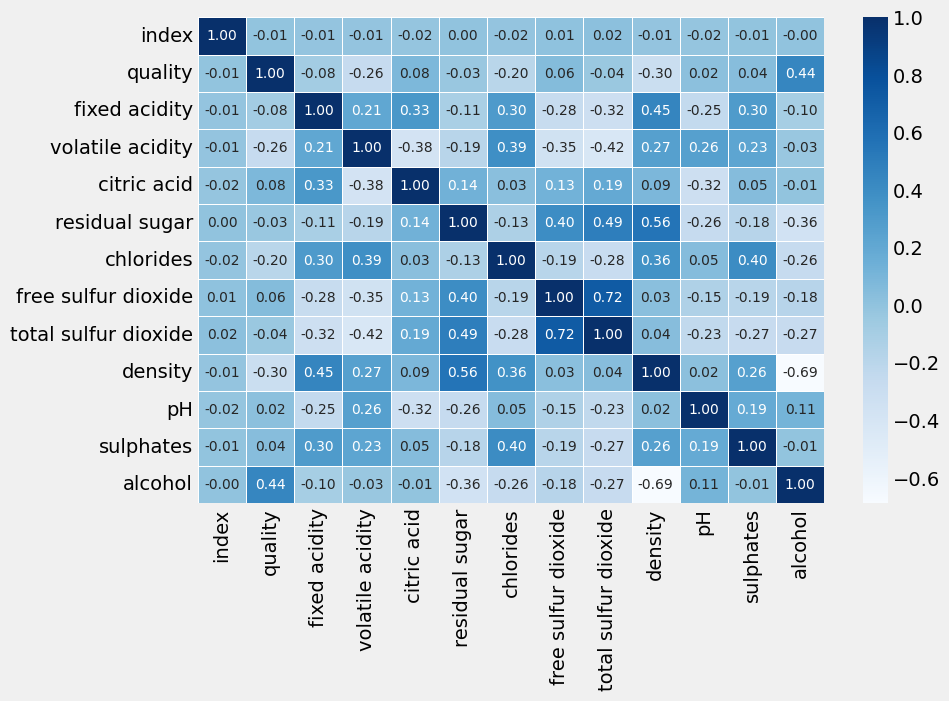

In [23]:
# 주의! 상관관계와 인관관계는 다름!!
# train의 변수 간 상관관계를 살펴보기.
plt.figure(figsize=(9, 6))
sns.heatmap(data = train.corr(), annot=True, annot_kws={"size": 10}, fmt = '.2f', linewidths=.5, cmap='Blues')

<Axes: >

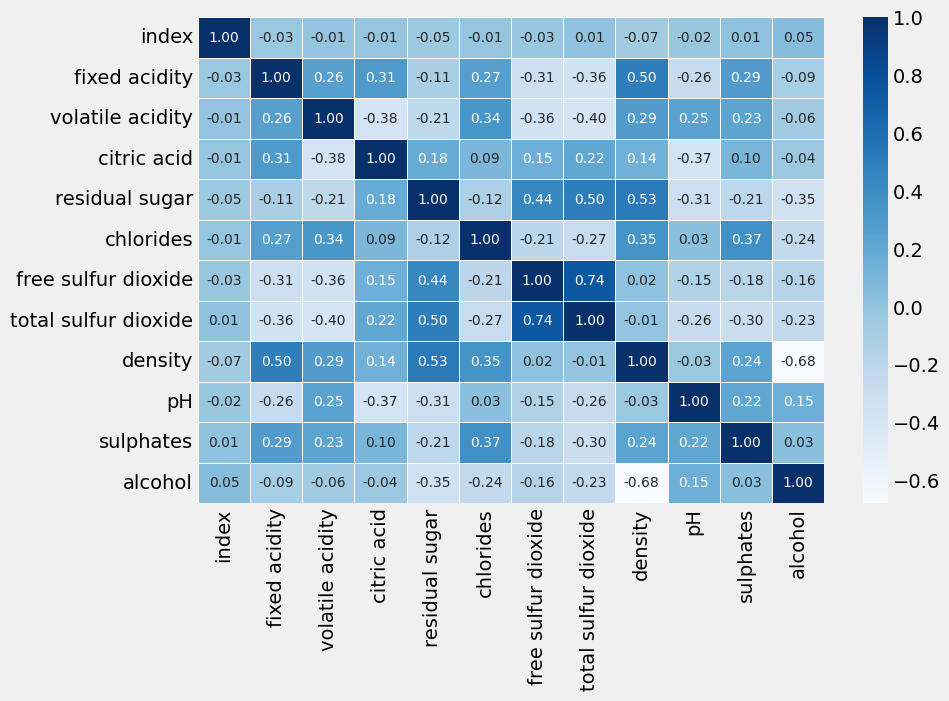

In [25]:
# 주의! 상관관계와 인관관계는 다름!!
# test의 변수 간 상관관계를 살펴보기.
plt.figure(figsize=(9, 6))
sns.heatmap(data = test.corr(), annot=True, annot_kws={"size": 10}, fmt = '.2f', linewidths=.5, cmap='Blues')

## <span style="color:red">[3]</span> 다양한 시각화 방법

Text(0.5, 1.0, 'dist. of type')

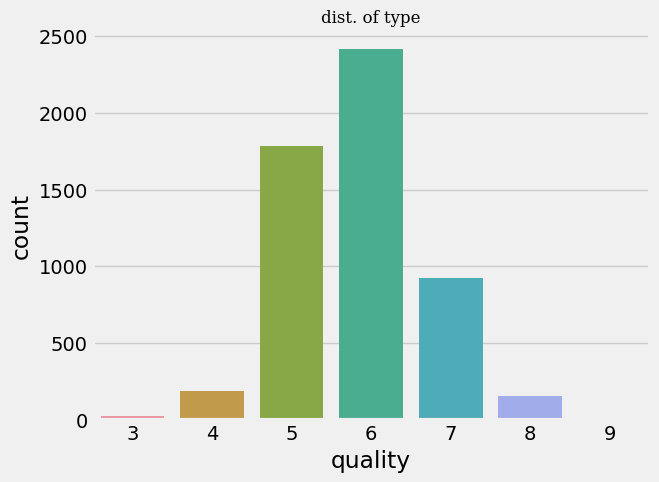

In [28]:
# 위에 quality 빈도수 확인 한 것을 시각화 한 것
sns.countplot(x = train['quality'])
plt.title("dist. of type", fontfamily = 'serif', fontsize = 12)

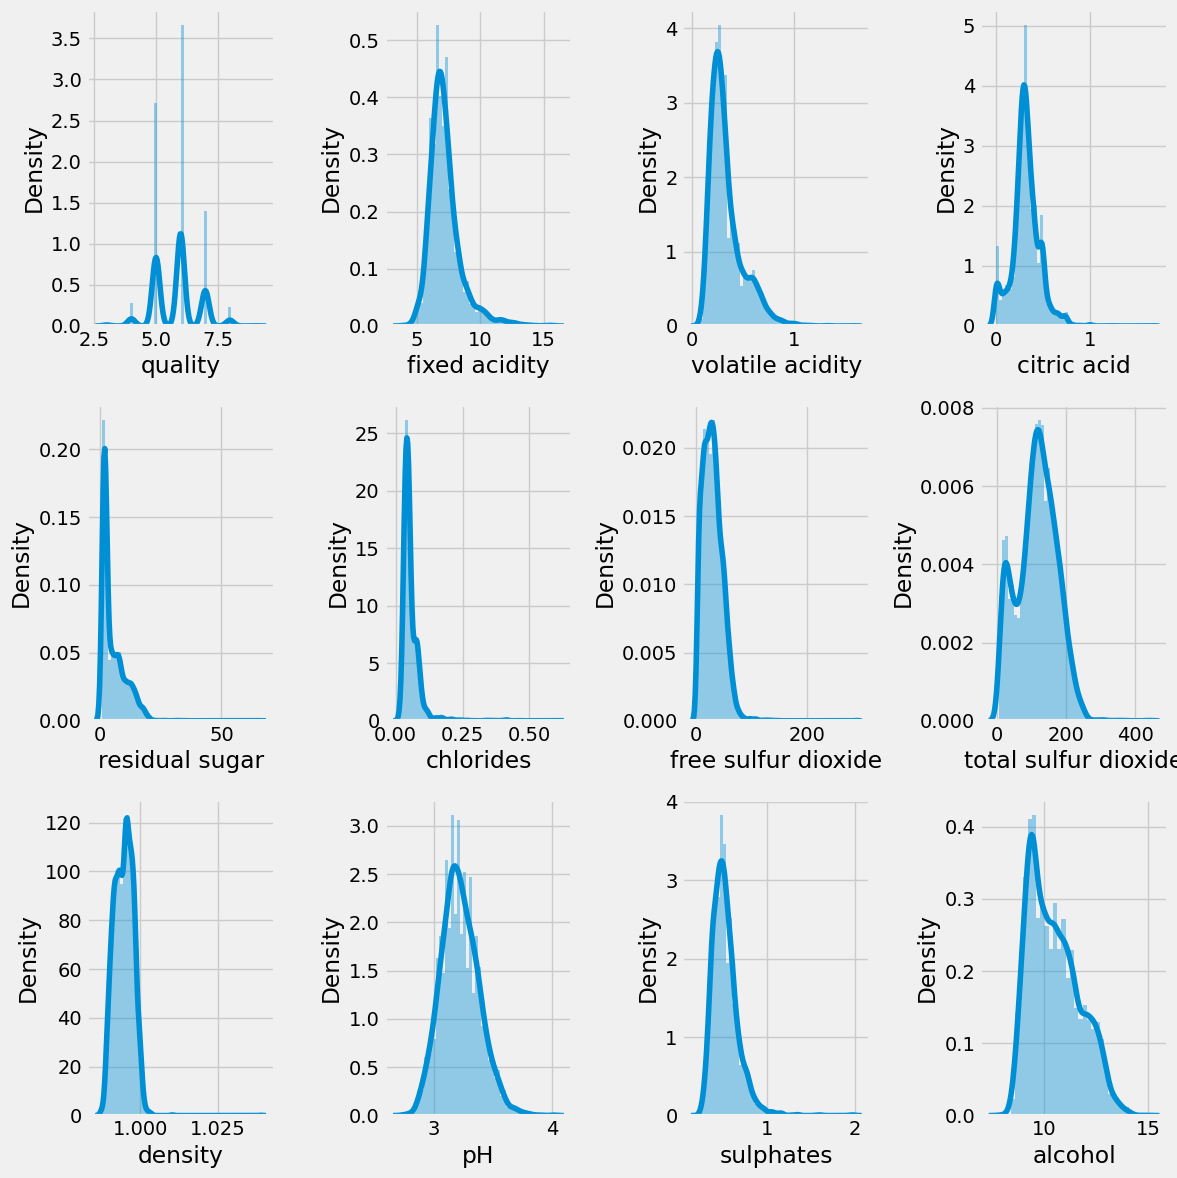

In [30]:
# train의 각 변수별 분포를 살펴봅니다. 
plt.figure(figsize=(12,12))
for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()
# 확률밀도함수의 y축이 density, 저 함수의 값을 적분하면 값이 1

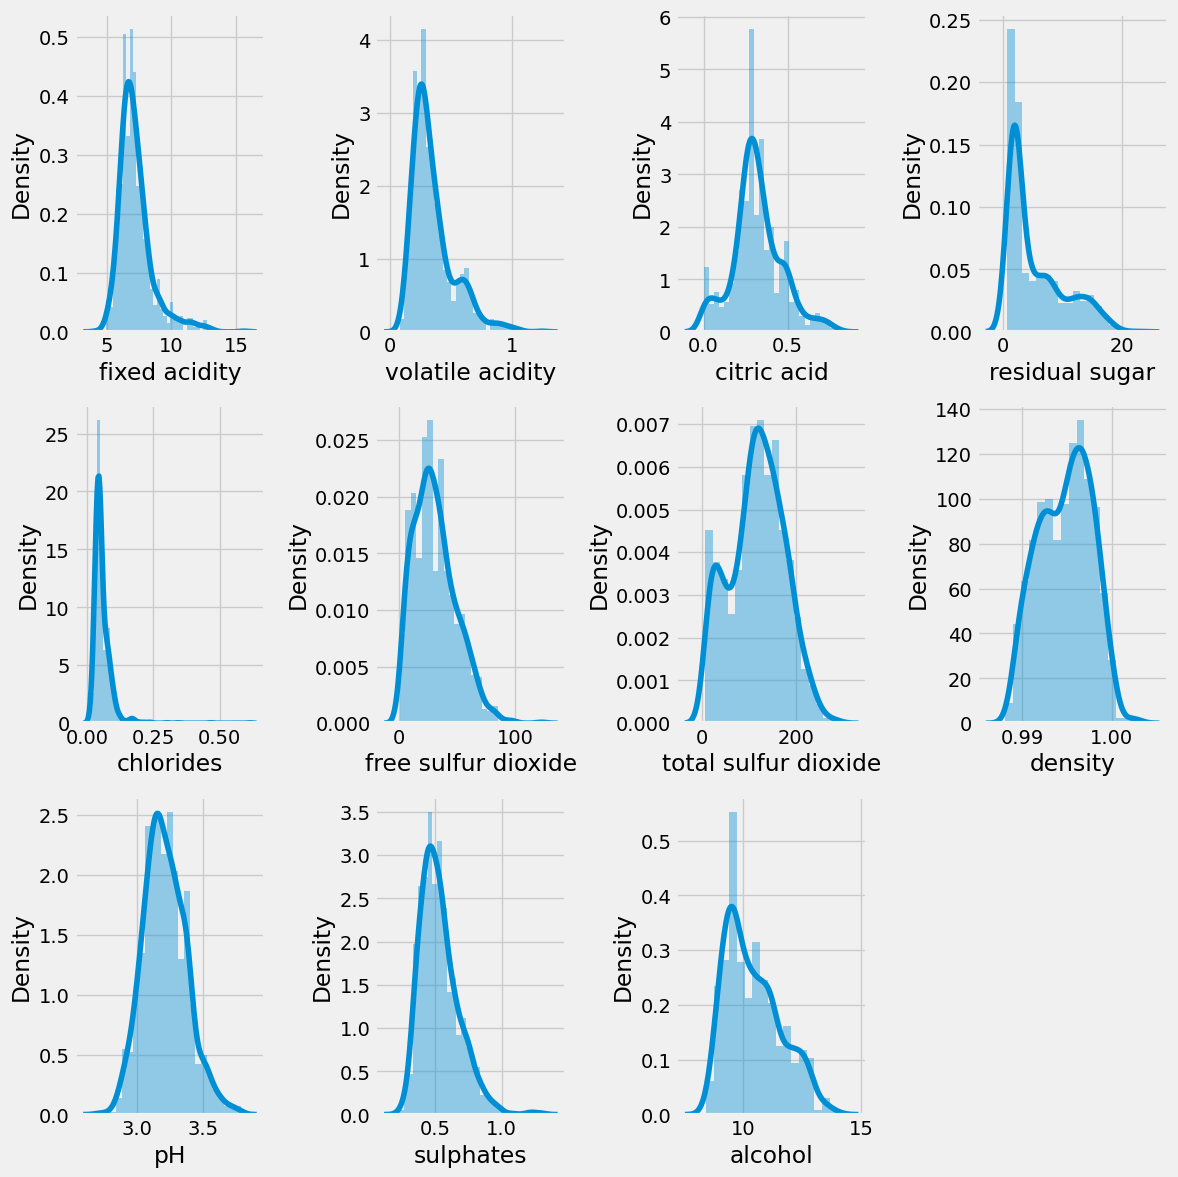

In [31]:
# test의 각 변수별 분포를 살펴봅니다. 
plt.figure(figsize=(12,12))
for i in range(1,12):
    plt.subplot(3,4,i)
    sns.distplot(test.iloc[:,i])
plt.tight_layout()
plt.show()
# 확률밀도함수의 y축이 density, 저 함수의 값을 적분하면 값이 1

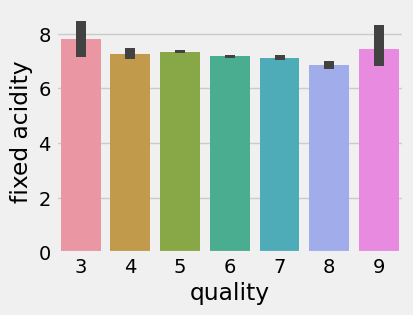

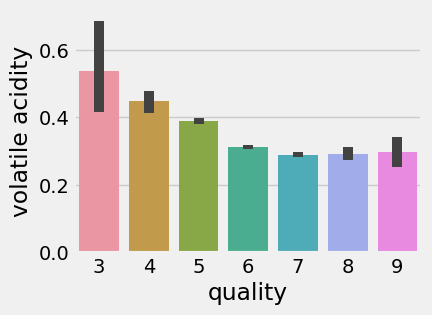

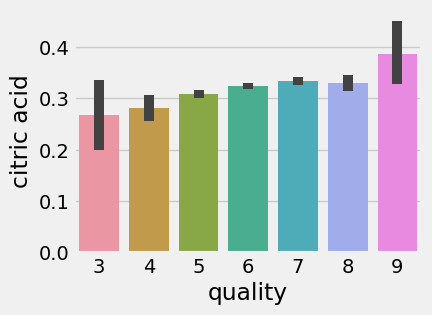

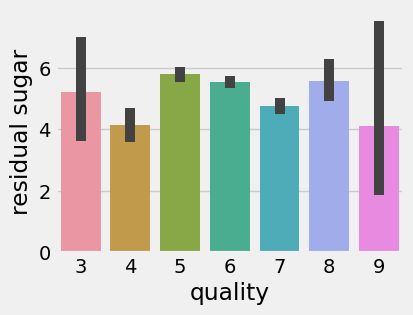

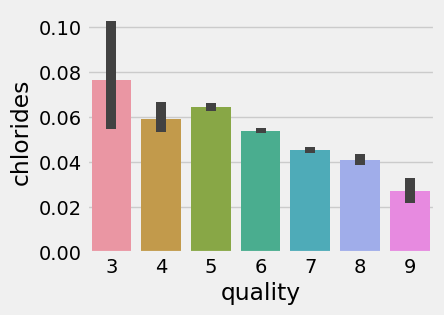

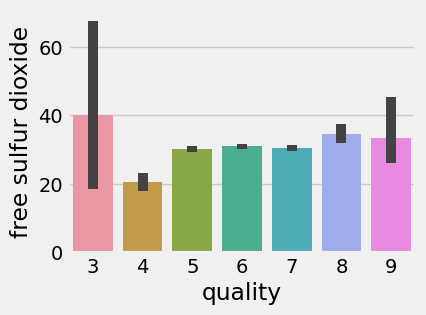

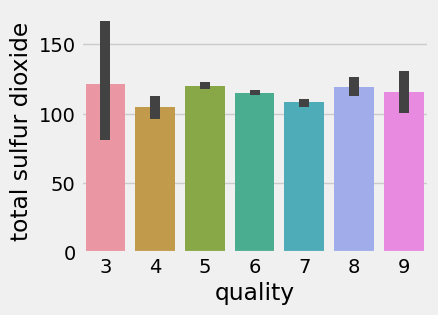

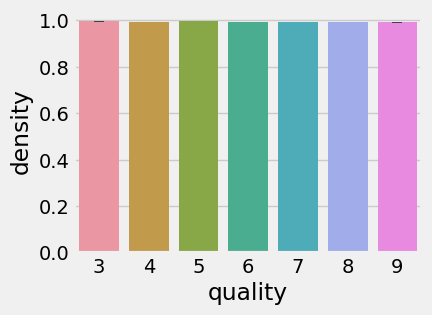

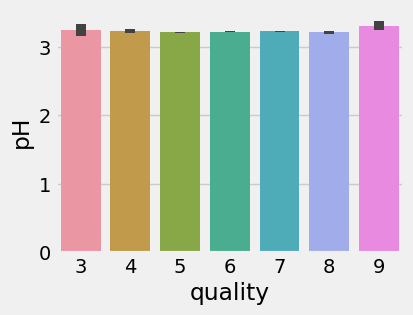

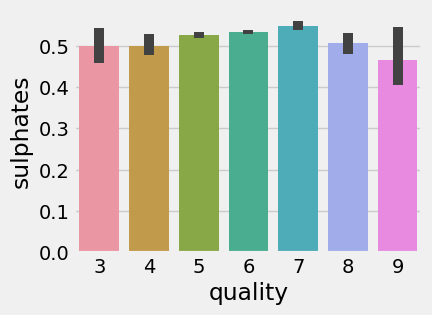

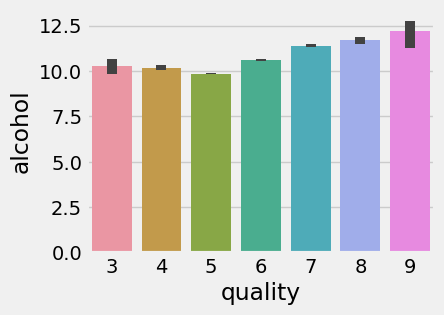

In [34]:
# train에서 각 변수와 quality 변수 사이 분포를 확인합니다.
for i in range(11):
    fig = plt.figure(figsize = (4, 3))
    sns.barplot(x = 'quality', y = train.columns[i+2], data = train)
# 해석을 못 하겠음

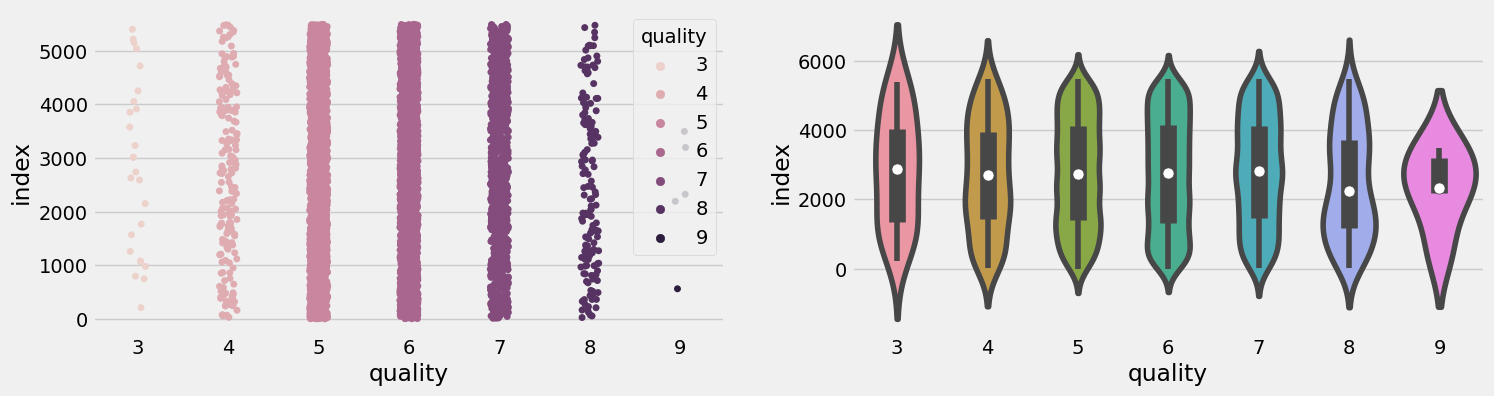

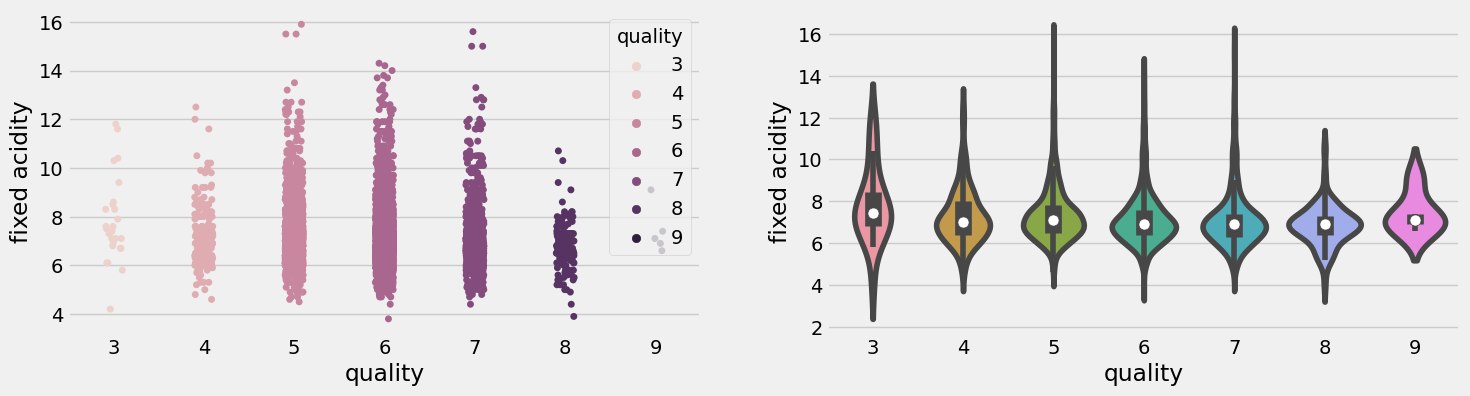

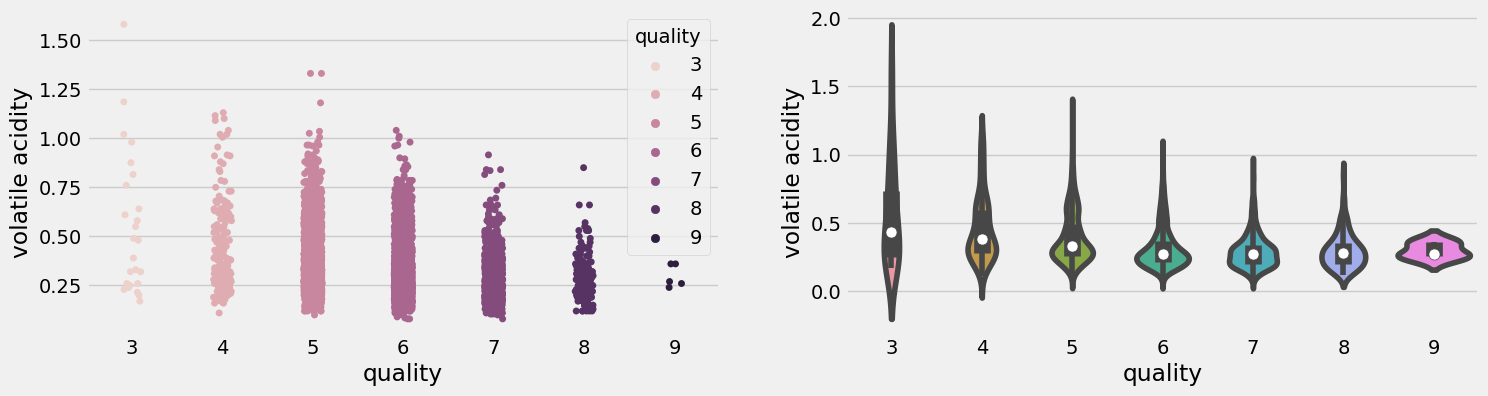

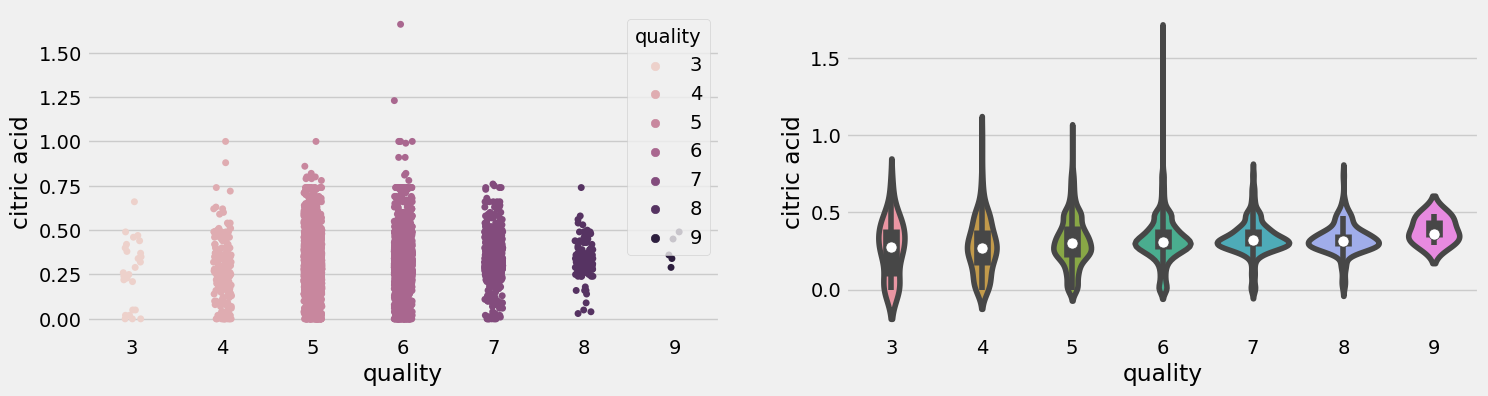

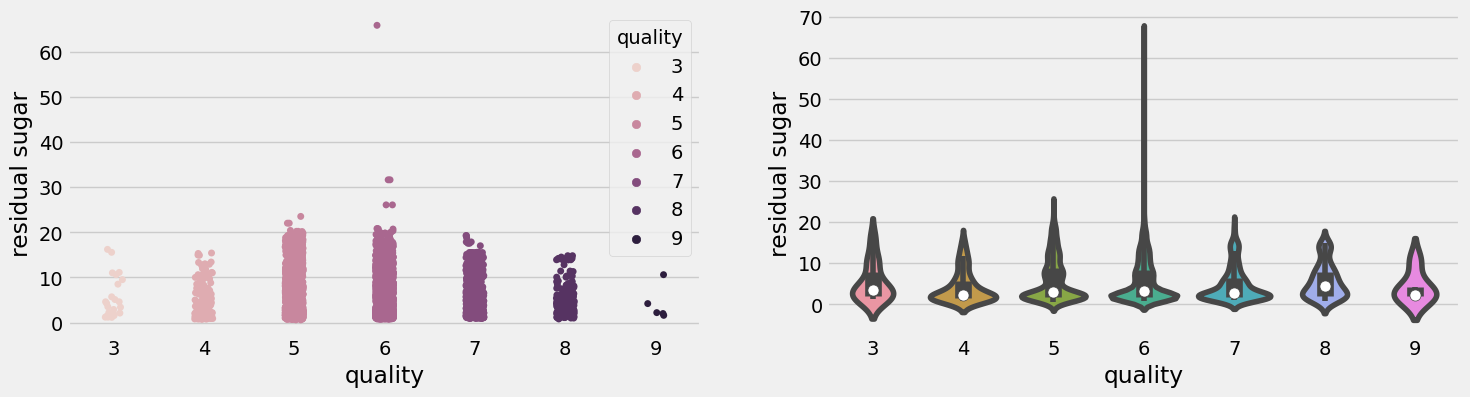

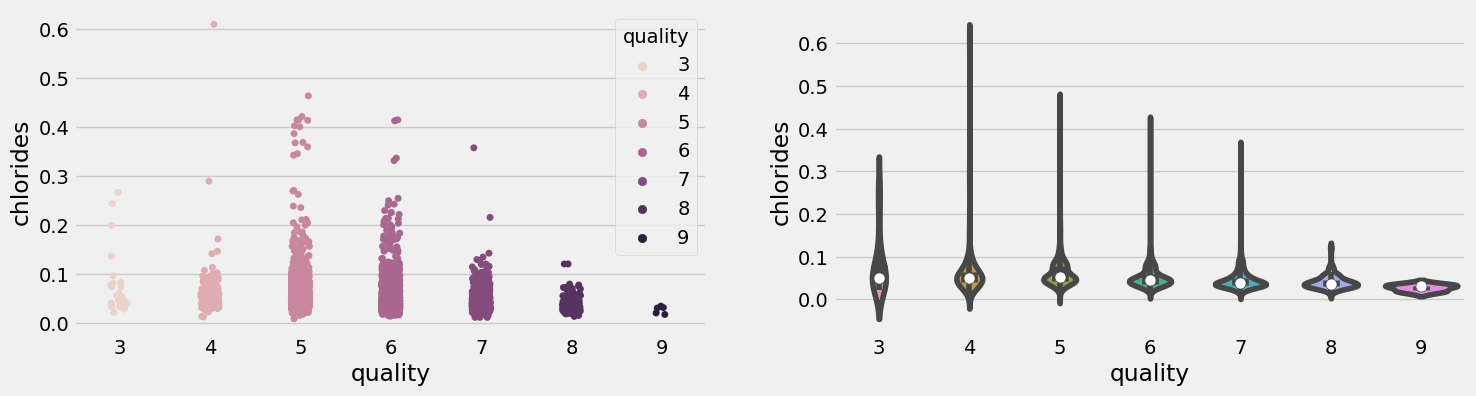

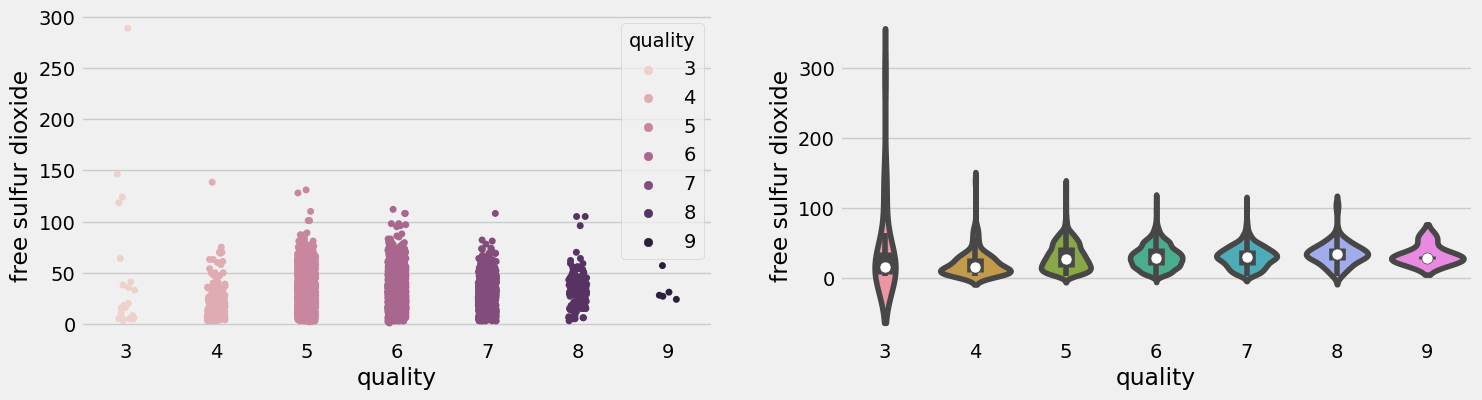

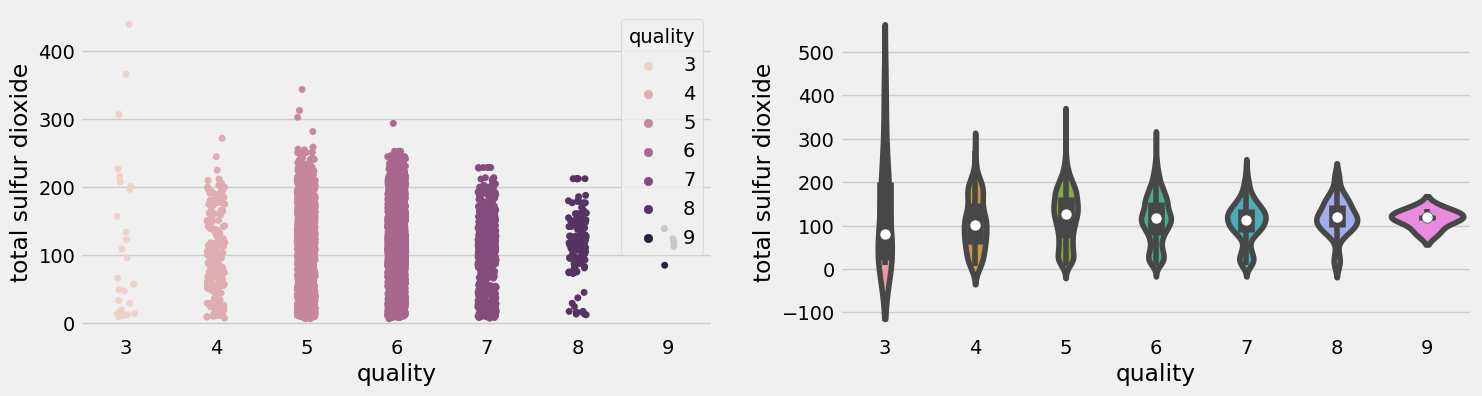

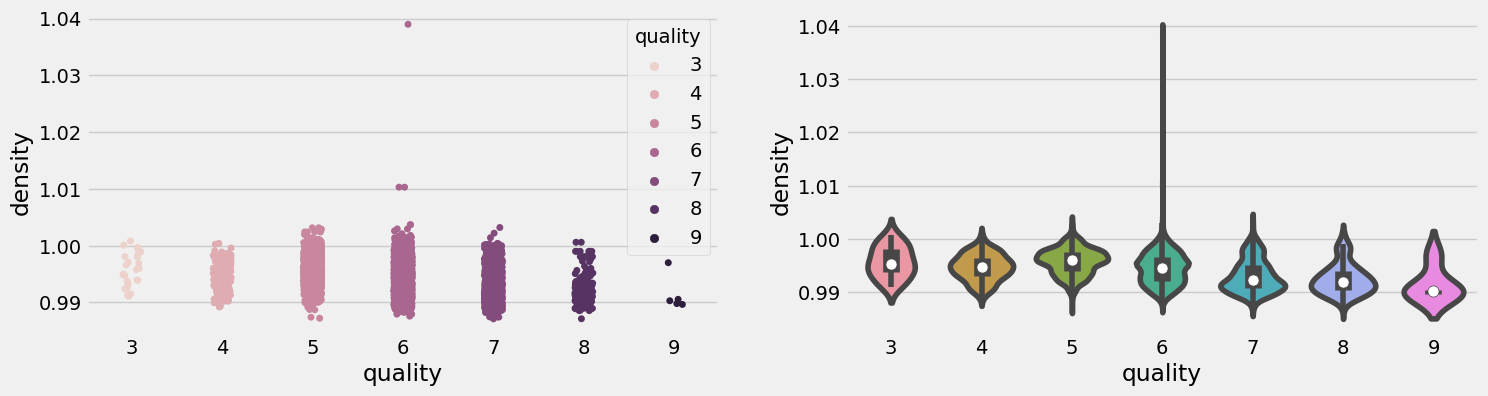

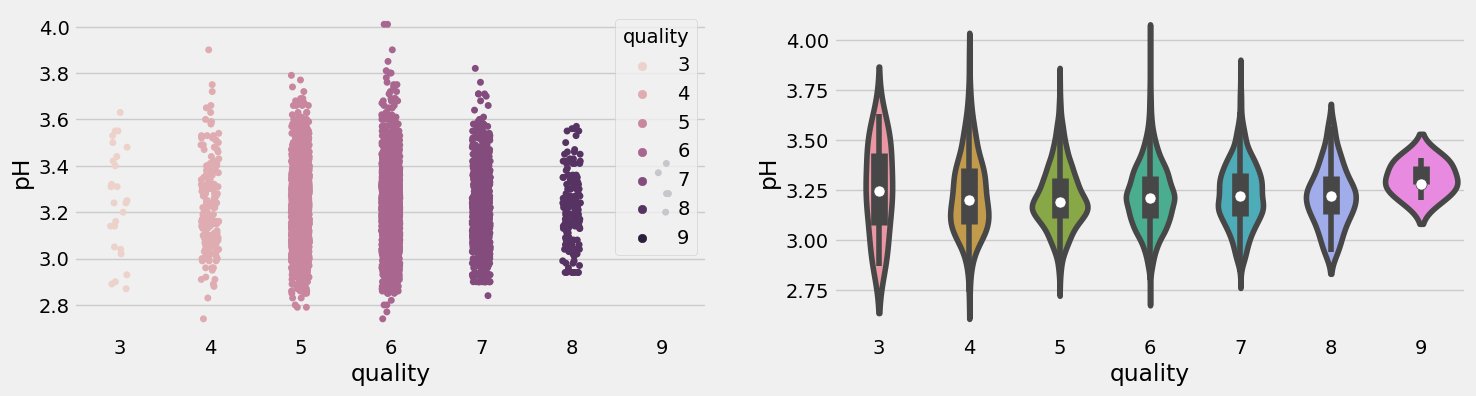

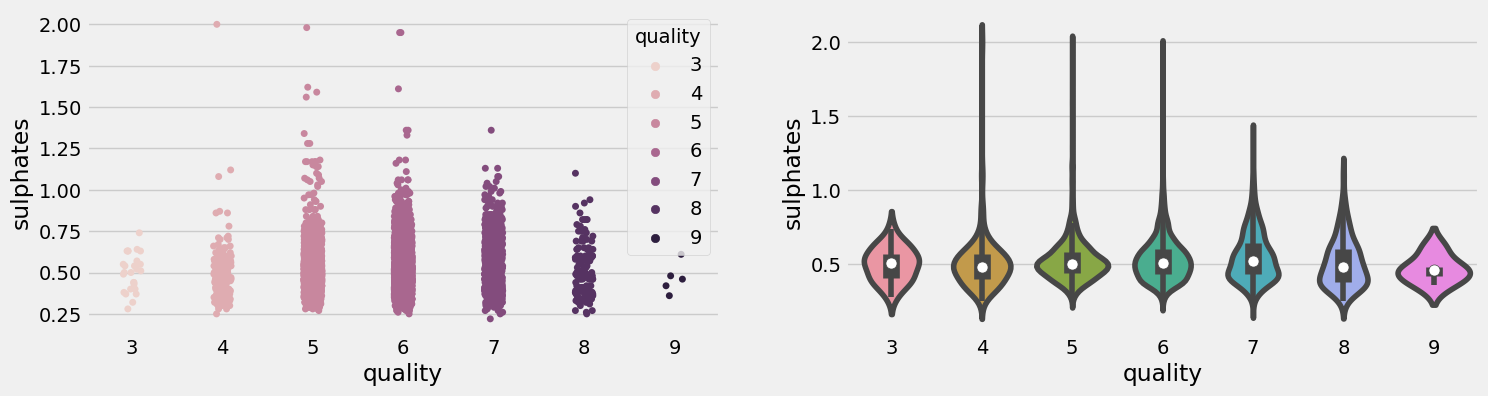

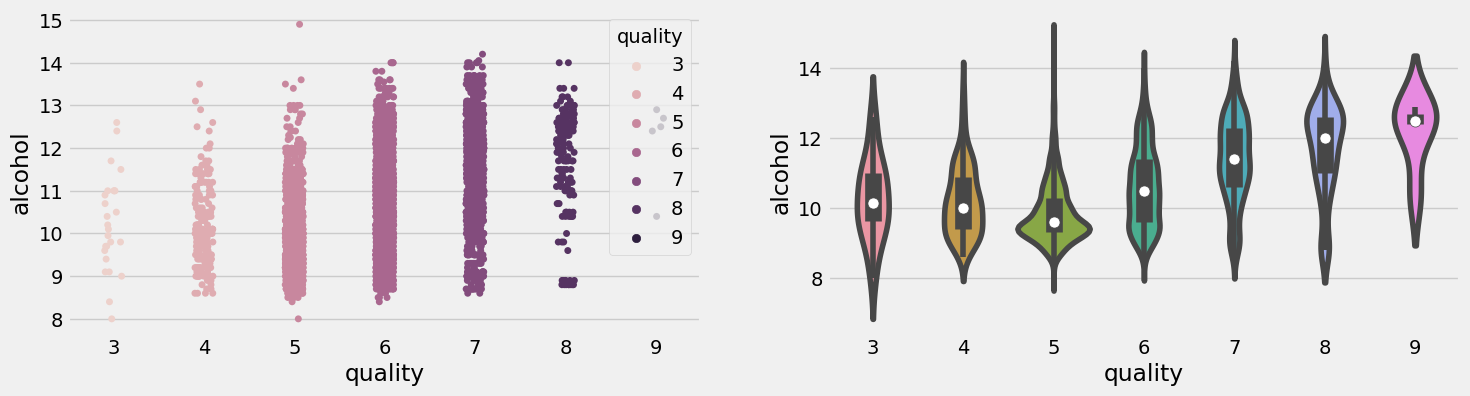

In [36]:
# distribution by 'quality'
numerical_columns = train.select_dtypes(exclude='object').columns.tolist()
numerical_columns.remove('quality')
def show_dist_plot(df, columns):
    for column in columns:
        f, ax = plt.subplots(1,2,figsize=(16,4))
        sns.stripplot(x=df['quality'],y=df[column], ax=ax[0],hue=df['quality'])
        sns.violinplot(data=df, x='quality', y=column, ax=ax[1])
        
show_dist_plot(train, numerical_columns)
# 해석을 못 하겠음

## <span style="color:red">[4]</span> 결론

1. train, test 데이터 둘 다 결측치가 없다.
2. train은 14개의 변수와 5497개의 값을 가지고 있다.
3. test는 13개의 변수와 1000개의 값을 가지고 있다.
4. 품질을 뜻하는 종속변수 "quality"는 3~9의 변수를 가지며 그 중, 6이 가장 많다.
5. train의 종속변수를 제외하면 각각 독립변수 후보는 12개이다.

#### train 데이터 상관관계 분석 [0.4는 이상인 것들 기준]
- index는 그 어떤 것도 관계성이 없음
- quality는 alchol과 관련성이 0.44로 가장 높음
- fixed acidity는 density와 0.45로 가장 높음
- volatile acidity는 total sulfur dioxide와 관련성이 - 0.42로 가장 높음
- citric acid는 그나마 volatile acidity과 -0.38로 그나마 높음
- residual sugar은 density와 0.56으로 가장 높음
- 그 외, total sulfur dioxide과는 0.49, free sulfur dioxide와 0.40의 관계성을 가짐
- chlorides는 sulphates와 0.40으로 가장 높음 그리고 volatile acidity와는 0.39로 2등
- free sulfur dioxide는 total sulfur dioxide와 0.72로 가장 관계성이 높음, residual sugar과 0.40으로 2등
- density는 alchol과 -0.69로 관계성이 높음

- 결론 : density(밀도)와 alchol(도수)과 -0.69로 가장 음의 상관관계가 높게 나타났으며
- free sulfur dioxide(독립이산화황)는 total sulfur dioxide(총이상화황)와 0.72로 양의 상관관계가 높게 나타났다.

#### test 데이터도 비슷한데 결론만 보면
- 똑같이 density(밀도)와 alchol(도수)과 -0.68로 가장 음의 상관관계가 높게 나타났으며
- free sulfur dioxide(독립이산화황)는 total sulfur dioxide(총이상화황)와 0.74로 양의 상관관계가 높게 나타났다.
- 유일하게 0.5 이상인 관계는 2가지였는데,
- fixed acidity, density = 0.5
- residual sugar, sulfur dioxide = 0.5
- residual sugar, density = 0.53

- 생각1 : 각각읭 scale(단위)가 다르기 때문에, 추 후에 모델링 할 때 '표준화'를 해야할 것 같다. [단위 통일] (ex. density와 pH 단위가 다르다.)
- 생각2 : train, test 둘 다 index는 필요 없음으로 삭제할 것이다.
- 생각3 : test 데이터에는 종속변수가 없으므로 모델링에서 train_test_split() 함수 사용해야한다.
- 생각4 : type에는 white와 red 두 종류가 있는데 각각 0,1로 변수변환해야 한다.
- 생각5 : 
- 생각6 : 

- 머신러닝 모델을 만들 때는 '학습 데이터'로 모델을 학습한 후, 모델 성능을 평가할 때는 '평가 데이터로'로 성능을 평가하기
- 때문에 전체 데이터를 나눠야 한다. 보통 7:3이나 8:2로 나눈다.
- 데이터에 대한 선 연구가 있다면, 그 연구에서는 어떻게 스플릿했는지 참고하는 것도 바람직하다.
- 데이터 규모가 매우 큰 경우는 99:1 비율로 나누기도 한다.
- sklearn.model 모듈에서 train_test_split 기능을 불러와서 사용
###### 
- 스케일(scale)이란 규모, 범위를 뜻하는 단어로, scale에 ing를 붙인 스케일링(scaling)은 데이터의 정보를 보존하면서 범위를 같게 만다는 작업이다.
- 데이터 특성들이 동일한 범위를 가지게 조정되면 특성들을 더 효과적으로 사용할 수 있다.
- 또한, 모델에 input 되었을 때, 스케일이 큰 변수가 variable importance를 더 많이 차지하는 등의 편향을 없애기 위해 스케일링을 하기도 한다.
- 데이터의 변화폭이 클 수록 머신러닝은 특성의 중요도를 과대평가할 수 있기 때문이다.
###### 
- Min Max 스케일링 - 데이터를 0과 1사이로 바꿔준다.
- standard scaling은 평균을 0, 표준편차를 1로 나눠준 것이다.
###### 
- fit_transform(), transform() 두 가지 함수를 사용, sklearn.preprocessing 모듈에서 Min Max Scalar 기능
- (fit은 스케일링의 기준을 세우며 변환하는 기능, transform은 기준에 따라 변환만 하는 기능을 가짐)

# <span style="color:Blue">전처리</span> : 2단계

In [ ]:
# index 열(변수)는 삭제한다. [무의미한 자료]
train = train.drop(['index'], axis = 1)
test = test.drop(['index'], axis = 1)

In [ ]:
# 모델에 입력하기 전 데이터를 정형합니다.
train_x = train.drop(['index', 'quality'], axis = 1)
train_y = train['quality']
test_x = test.drop('index', axis = 1)

In [ ]:
# type에는 white와 red 두 종류가 있습니다.
# 각각 0,1로 변환합니다.
train['type'] = train['type'].map({'white':0, 'red':1}).astype(int)
test['type'] = test['type'].map({'white':0, 'red':1}).astype(int)

In [ ]:
# type에는 white와 red 두 종류가 있습니다.
# 각각 0,1로 변환합니다.
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

In [ ]:
# 불필요한 변수 제거
train_x = train.drop(['index', 'quality'], axis = 1)
train_y = train['quality']
test_x = test.drop('index', axis = 1)

In [ ]:
train_x.shape, train_y.shape, test_x.shape

# <span style="color:Blue">모델링</span> : 3단계

In [ ]:
# 학습된 모델로 test 데이터 예측
y_pred = model.predict(test_x)
submission = pd.read_csv('sample_submission.csv')
submission['quality'] = y_pred
submission
# csv 파일로 저장합니다.
submission.to_csv('baseline.csv', index=False)

In [ ]:
# 4. 모델을 생성 및 훈련합니다.
model = lgbm.LGBMClassifier()
model.fit(train_x,train_y)
y_pred = model.predict(test_x)
y_pred